## Supplementary Figure - Ramping weekday vs weekend
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((6, 5)) # weekday
vals2 = np.zeros((6, 5)) # weekend

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0, 1, 2, 3, 4])]['demand'].values.reshape(-1, 24).mean(axis=0)
        prof1[24] = prof1[0]
        vals1[i, j] = np.max(prof1[1:] - prof1[:-1])
        
        prof2 = np.zeros((25, ))
        prof2[np.arange(0, 24)] = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([5, 6])]['demand'].values.reshape(-1, 24).mean(axis=0)
        prof2[24] = prof2[0]
        vals2[i, j] = np.max(prof2[1:] - prof2[:-1])

        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
overgen = None
try: 
    dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')

prof1 = np.zeros((25, ))
prof1[np.arange(0, 24)] = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0, 1, 2, 3, 4])]['demand'].values.reshape(-1, 24).mean(axis=0)
prof1[24] = prof1[0]
vals1[i, j] = np.max(prof1[1:] - prof1[:-1])

prof2 = np.zeros((25, ))
prof2[np.arange(0, 24)] = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([5, 6])]['demand'].values.reshape(-1, 24).mean(axis=0)
prof2[24] = prof2[0]
vals2[i, j] = np.max(prof2[1:] - prof2[:-1])


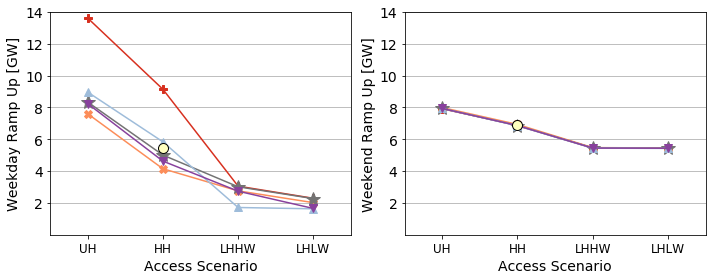

In [11]:
plt.figure(figsize=(10, 4))
titles = ['UH', 'HH', 'LHHW', 'LHLW']

colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Max(Avg Em) Work Control']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Weekday Ramp Up [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=titles, fontsize=12)

ms = [8, 8, 14, 8, 8]
lines = ['-P', '-X', '-*', '-^','-v']
for control_idx in range(5):
    plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*vals1[5, 4]), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.xlim([-0.5, 3.5])
plt.yticks(np.arange(2, 15, 2), fontsize=14)
plt.ylim([0, 14])
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

plt.subplot(122)

plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Weekend Ramp Up [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=titles, fontsize=12)

ms = [8, 8, 14, 8, 8]
lines = ['-P', '-X', '-*', '-^','-v']
for control_idx in range(5):
    plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*vals2[5, 4]), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.xlim([-0.5, 3.5])
plt.yticks(np.arange(2, 15, 2), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')
plt.ylim([0, 14])

plt.tight_layout()
plt.savefig('SupplementPlotting/Plots/supfig6.pdf', bbox_inches='tight')
plt.show()